"The visualization of the Dynamics of the Logistic Map"
coded by Arnaja Mitra

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Define the Logistic map
def logistic(a, x):
    return a * x * (1 - x)

Text(0.5, 1.0, 'The Logistic map for a=3')

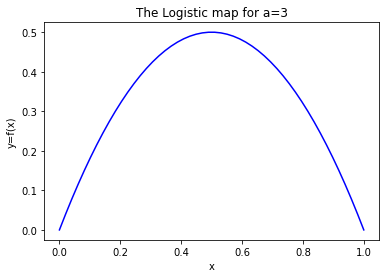

In [31]:
# Ploting the map for a=3
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'b')
ax.set_xlabel("x")
ax.set_ylabel("y=f(x)")
ax.set_title("The Logistic map for a=3")

Calculation of few iterations for two different parameter ("a") values

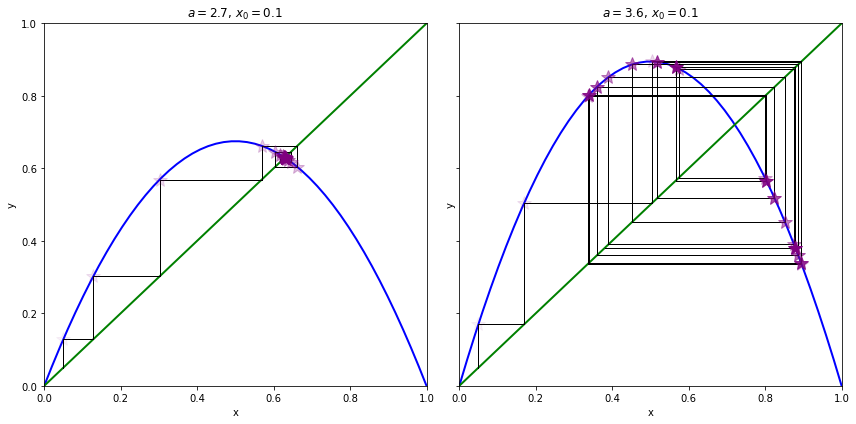

In [32]:
# Define the corresponding discrete Dynamical System by applying
# the above Logistic map and draw the diagonal line y=x 
def discrete_system(a, x0, n, ax=None):
    u = np.linspace(0, 1)
    ax.plot(u, logistic(a, u), 'b', lw=2)
    ax.plot([0, 1], [0, 1], 'g', lw=2)

# For each of iterations ploting the staircase between the Logistic map 
# and the diagonal line y=x
    x = x0
    for i in range(n):
        y = logistic(a, x)
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        
# Plotting the position of point in each iterations and highlighting
        ax.plot([x], [y], color="purple", marker= '*', ms=15, alpha=(i + 1) / n)
        x = y

# Setting x and y limits 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"$a={a:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
discrete_system(2.7, .05, 20, ax=ax1)
discrete_system(3.58, .05, 20, ax=ax2)
plt.tight_layout()

Simulations of 10000 lineraly spaced 'a' values between 2.5 and 4 and the
corresponding "Bifurcation diagram"

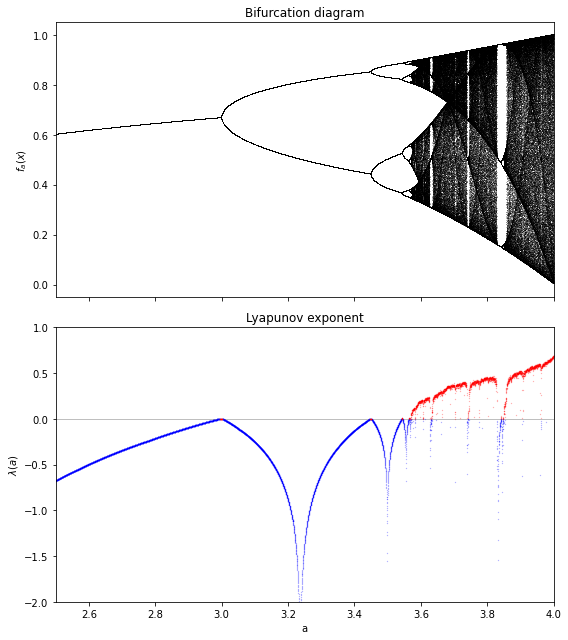

In [43]:
# 10000 lineraly spaced 'a' values as a vector 
m = 10000
a = np.linspace(2.5, 4.0, m)

# Consider 1000 interations of the Logistic map and will show the last 100
iterations = 1000
last = 100

# Consider all the 10000 system of Logistic map with the same initial condition
x0 = 1e-5 * np.ones(m)

# Introducing the Lyapunov vector
lyapunov = np.zeros(m)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True)

# Drawing all the Logistic map for 2.5<=a<=4
x=x0
for i in range(iterations):
    x = logistic(a, x)
    
# Bifurcation diagram
    if i >= (iterations - last):
        ax1.plot(a, x, ',k', alpha=.25)
        ax1.set_xlim(2.5, 4)
        ax1.set_ylabel("$f_{a}(x)$")
        ax1.set_title("Bifurcation diagram")
        
# Computation of the partial sum of the Lyapunov exponent
    lyapunov += np.log(abs(a - 2 * a * x))
    
# Horizontal line
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# Negative Lyapunov exponent
ax2.plot(a[lyapunov < 0], lyapunov[lyapunov < 0] / iterations, '.b', alpha=.5, ms=.5)

# Positive Lyapunov exponent
ax2.plot(a[lyapunov >= 0], lyapunov[lyapunov >= 0] / iterations, '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_ylabel("$\lambda(a)$")
ax2.set_xlabel("a")
ax2.set_title("Lyapunov exponent")
plt.tight_layout()